Calcular $u:[a,b] \to \mathbb R$ solución de
\begin{align}
  \label{pb.conveccion-difusion-1d}
  c \cdot u'(x) - u''(x) = f(x), \quad x\in[a,b], \\
  u(a)=u_a, \ u(b)=u_b,
\end{align}


h=0.045454545454545456, Pe=0.045454545454545456


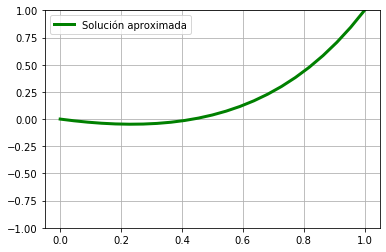

In [1]:
from numpy import diag, ones, linspace, array
import ipywidgets

def conv_difus_1d(f, c, ua, ub, n, a=0, b=1):
    """
    Esta función resuelve el problema de convección-difusión 1d
        c u' - u''  = f     en [a,b]
        u(a) = ua
        u(b) = ub
    mediante el método de las diferencias finitas sobre n+1 intervalos
    """
    h = (b-a)/(n+1) # Tamaño de la partición
    print(f"h={h}, Pe={abs(c)*h/2}")
        # 1. Matriz
        

    c0 = 2  # Diagonal coefficient a_{ii}
    c_minus = -h*c/2 - 1 # Under-diagonal coefficient a_{i-1,i}
    c_plus  =  h*c/2 - 1

    A_h = (1./h**2) * (
            c0 * diag( ones(n) ) 
            + c_plus * diag( ones(n-1), +1 ) 
            + c_minus * diag( ones(n-1), -1 )
            )    
        
    # 2. Segundo miembro
    f_h = []
    x = linspace(0, 1, num=n+2) # x_0, ..., x_{n-1}
    x_interior = x[1:n+1]
    
    f_h = f(x_interior) # f_h es el array resultante de aplicar f a cada elmento del array x
    f_h[0]  += ua/h**2 + c*ua/(2*h)
    f_h[-1] += ub/h**2 - c*ub/(2*h)
    
    # 3. Resolver sistema
    from numpy.linalg import solve
    u_h = solve(A_h, f_h)

    # Concatenamos la solución con los datos en los extremos del intervalo
    u = array( [ua] + list(u_h) + [ub] )
    
    # Devolvemos la partición x y la solución obtenida
    return x, u

def solución(c=0,n=21):
    f = lambda x: -2 + 0*x
    x_h, u_h = conv_difus_1d(f, c, ua=0, ub=1, n=n)

    from matplotlib.pylab import plot, show, grid, legend, ylim
    ylim(-1,1)
    plot(x_h, u_h, label="Solución aproximada", linewidth=3, color="green")
    grid()
    legend()
    show()
    
#ipywidgets.interact( solución, c=(0,200,10), n=(1,81,2))
solución(c=2)

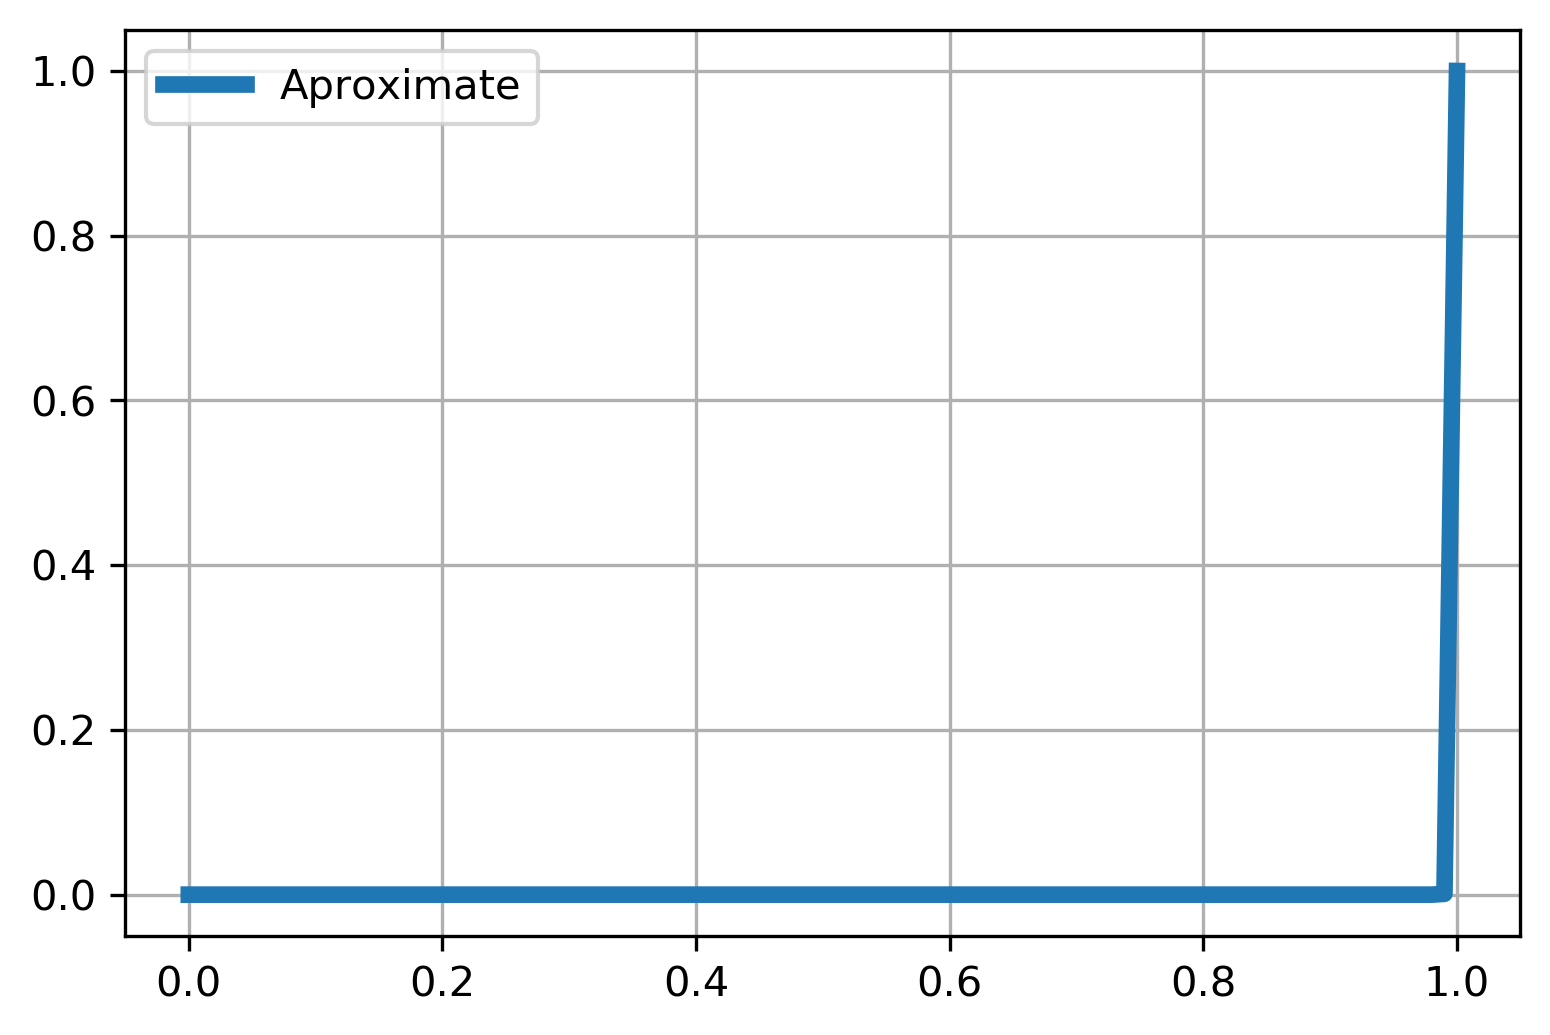

Pe=500.0


In [35]:
from numpy import sign

def upwind_conv_difus_1d(f, c, ua, ub, n, a=0, b=1):
    """
    Esta función resuelve el problema de convección-difusión 1d
        c u' - u''  = f     en [a,b]
        u(a) = ua
        u(b) = ub
    mediante el método de las diferencias finitas sobre n+1 intervalos
    """
    h = (b-a)/(n+1) # Tamaño de la partición
    
    # 1. Matriz       
    if c>0:
        c0 = 2 + h*c  # Diagonal coefficient a_{ii}
        c_minus = -1 - h*c # Under-diagonal coefficient a_{i-1,i}
        c_plus = -1 # Over-diagonal coefficient, a_{i,i+1}
    else:
        c0 = 2 - h*c  # Diagonal coefficient a_{ii}
        c_minus = - 1
        c_plus = -1 - h*c

    A_h = (1./h**2) * (
            c0 * diag( ones(n) ) 
            + c_plus * diag( ones(n-1), +1 ) 
            + c_minus * diag( ones(n-1), -1 )
            )
    # 2. Segundo miembro
    f_h = []
    x = linspace(0, 1, num=n+2) # x_0, ..., x_{n-1}
    x_interior = x[1:n+1]
    
    f_h = f(x_interior) # f_h es el array resultante de aplicar f a cada elmento del array x
    f_h[0]  += ua/h**2 
    f_h[-1] += ub/h**2
    if c>0:
        f_h[0]  += c*ua/h
    else:
        f_h[-1] -= c*ub/h
    
    # 3. Resolver sistema
    from numpy.linalg import solve
    u_h = solve(A_h, f_h)

    # Concatenamos la solución con los datos en los extremos del intervalo
    u = array( [ua] + list(u_h) + [ub] )
    
    # Devolvemos la partición x y la solución obtenida
    return x, u

def solución(c=0,n=21):
    f = lambda x: 0*x
    x_h, u_h = upwind_conv_difus_1d(f, c, ua=0, ub=1, n=int(n))

    from matplotlib.pylab import plot, show, grid, legend, figure
    figure(dpi=300)
    plot(x_h, u_h, label="Aproximate", linewidth=4)#, color="blue")
    grid()
    legend()
    show()

convect=100000; n=100
solución(c=convect,n=n)
print(f"Pe={(convect*1/n)/(2*1)}")
#ipywidgets.interact( solución, c=(0,200,10), n=(1,100,1))
